# Visualization of Kappa calculation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

filename = "PythonAPI/carla_mpc_classic_log.h5"
filename2 = "PythonAPI/carla_mpc_curv_log.h5"
filename3 = 'PythonAPI/kappa_debug_log.h5'
filename4 = 'PythonAPI/kappa_debug_logN15.h5'
filename5 = 'PythonAPI/frenet_constant_velo.h5'

file_pid = 'PythonAPI/frenet_pid_speed_limit.h5'
file_frenet_speed_limit = 'PythonAPI/frenet_mpc_speed_limit.h5'
file_frenet_constant_vel = 'PythonAPI/frenet_constant_velo.h5'
file_frenet_speed_limit2 = 'PythonAPI/frenet_mpc_speed_limit2.h5'
file_frenet_wp15 = 'PythonAPI/frenet_mpc_wp15.h5'
file_frenet_wp15_first5 ='PythonAPI/frenet_mpc_wp15_first5only51m.h5'
file_frenet_wp15_alsoHist = 'PythonAPI/frenet_mpc_wp15_alsoHist.h5'
file_kappa_fkt = 'PythonAPI/frenet_mpc_wKappaFunc.h5'

file_lane_change = 'PythonAPI/frenet_lane_change.h5'
file_x_axis = 'PythonAPI/x_correction.h5'

In [21]:
def rotmat(angle_rad):
    """
    Computes a 2x2 rotation matrix
    :param angle_rad: Rotation angle in rad
    :return: 2x2 rotation matrix
    """
    c = np.cos(angle_rad)
    s = np.sin(angle_rad)
    return np.array([[c, s],
                     [-s, c]])


def polynomial3(x, p0, p1, p2, p3):
    """
    3th-polynomial function for modeling a street trajectory.
        function: y = p3 * x³ + p2 * x² + p1 * x + p0
    --------
    :param x:
    :param p0, p1, p2, p3:
    :return: y
    """
    return p3 * x ** 3 + p2 * x ** 2 + p1 * x + p0


def polynomial3_prime(x, p1, p2, p3):
    """
    First derivation of 3th-polynomial function for modeling a street trajectory.
        function: y = 3 * p3 * x² + 2 * p2 * x + p01
    --------
    :param x:
    :param p0, p1, p2, p3:
    :return: y
    """
    return 3 * p3 * x ** 2 + 2 * p2 * x + p1


def polynomial3_prime2(x, p2, p3):
    """
    Second derivation of 3th-polynomial function for modeling a street trajectory.
        function: y = 6 * p3 * x + 2 * p2 * x
    --------
    :param x:
    :param p0, p1, p2, p3:
    :return: y
    """
    return 6 * p3 * x + 2 * p2


def func_kappa(x, p_arg):
    """
    Curvature function of a waypoint reference line.
    :param x: longitude value
    :param p_arg: np.array of fitted polynomial factors --> [p0, p1, p2, p3]
    :return: curvature of reference line at point x.
    """
    result = polynomial3_prime2(x, p_arg[2], p_arg[3])
    denominator = 1 + polynomial3_prime(x, p_arg[1], p_arg[2], p_arg[3]) ** 2
    denominator = denominator ** 1.5

    return result / denominator

def func_kappa2(x, p_arg):
    """
    Curvature function of a waypoint reference line for a n-th polynomial.
    :param x: longitude value
    :param p_arg: np.array of fitted polynomial factors --> [p0, p1, p2, p3]
    :return: curvature of reference line at point x.
    """
    # if a constant is passes as polynomial arguments --> return p_arg as already calculated kappa
    if isinstance(p_arg, float) or isinstance(p_arg, int):
        return p_arg

    p = np.poly1d(p_arg)
    p_prime = np.polyder(p)
    p_prime2 = np.polyder(p, 2)

    result = p_prime2(x)
    denominator = 1 + p_prime(x) ** 2
    denominator = denominator ** 1.5

In [4]:


data = pd.read_hdf(filename5, 'kappa_log')

data_pid = pd.read_hdf(file_pid, 'kappa_log')
data_frenet_speed_limit = pd.read_hdf(file_frenet_speed_limit, "kappa_log")
data_frenet_constant_velo = pd.read_hdf(file_frenet_constant_vel, "kappa_log")
data_frenet_speed_limit2 = pd.read_hdf(file_frenet_speed_limit2, "kappa_log")
data_frenet_wp15 = pd.read_hdf(file_frenet_wp15, 'kappa_log')
data_frenet_wp15_5 = pd.read_hdf(file_frenet_wp15_first5, 'kappa_log')
data_frenet_wp15_Hist = pd.read_hdf(file_frenet_wp15_alsoHist, 'kappa_log')
data_kappa_func = pd.read_hdf(file_kappa_fkt, 'kappa_log')

data_lane_change = pd.read_hdf(file_lane_change, 'kappa_log')
data_x_axis = pd.read_hdf(file_x_axis, 'kappa_log')

data_frenet_speed_limit2


,wp_mat,wp_mat_0,refernce_point,rotations_mat,angle_wp,p_opt
timestamp,,,,,,
0.00,"[[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0...","[[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0...","[0, 0]","[[1.0, 0.0], [-0.0, 1.0]]",0.000000,"[0, 0, 0, 0]"
0.00,"[[-30.0000021516689, -5.42259543877104e-06], [...","[[13.411566734313965, -216.56271362304688], [1...","[13.293829917907715, -186.5629425048828]","[[-0.003924379513620069, 0.9999922995930685], ...",1.574721,"[-1.8014506662139603e-07, 1.8029353104035263e-..."
0.03,"[[-30.0000021516689, -5.42259543877104e-06], [...","[[13.411566734313965, -216.56271362304688], [1...","[13.293829917907715, -186.5629425048828]","[[-0.003924379513620069, 0.9999922995930685], ...",1.574721,"[-1.8014506662139603e-07, 1.8029353104035263e-..."
0.07,"[[-30.0000021516689, -5.42259543877104e-06], [...","[[13.411566734313965, -216.56271362304688], [1...","[13.293829917907715, -186.5629425048828]","[[-0.003924379513620069, 0.9999922995930685], ...",1.574721,"[-1.8014506662139603e-07, 1.8029353104035263e-..."
0.10,"[[-30.0000021516689, -5.42259543877104e-06], [...","[[13.411566734313965, -216.56271362304688], [1...","[13.293829917907715, -186.5629425048828]","[[-0.003924379513620069, 0.9999922995930685], ...",1.574721,"[-1.8014506662139603e-07, 1.8029353104035263e-..."
...,...,...,...,...,...,...
153.50,"[[-39.90296455014458, 0.6121605505118778], [-3...","[[12.867914199829102, -234.017578125], [13.153...","[13.32345962524414, -194.11251831054688]","[[-0.003924781329199918, 0.9999922980160987], ...",1.574721,"[-0.05301209578909806, 0.00020144321991608837,..."
153.53,"[[-39.84391743517503, 0.5409434145912014], [-3...","[[12.93571949005127, -233.14813232421875], [13...","[13.320280075073242, -193.30239868164062]","[[-0.003924781329199918, 0.9999922980160987], ...",1.574721,"[-0.04694733163099107, 0.00023986249020799255,..."
153.57,"[[-39.78439544391035, 0.47410411354444887], [-...","[[12.999135971069336, -232.27821350097656], [1...","[13.317100524902344, -192.4922637939453]","[[-0.003924551494491718, 0.9999922989181302], ...",1.574721,"[-0.041096641497392644, 0.00025794210399807804..."


## Display reference curvature 

In [14]:
def plot_ref_curve(data, t: float):
    plt.rcParams["figure.figsize"] = (20,10)
    plt.suptitle("Reference Curva at timestamp:" + str(t), fontsize=16)
    curve = data.loc[t]['wp_mat']

    fig, ax = plt.subplots()
    ax.scatter(curve[:,0], curve[:,1])
    ax.plot(curve[:,0], curve[:,1])
    plt.xlabel("X")
    plt.ylabel("Y")

    n = np.linspace(0,curve.shape[0] - 1,curve.shape[0])
    for i, txt in enumerate(n):
        ax.annotate(int(txt), (curve[i,0], curve[i,1]))
    x, y = get_poly_values(data, t)
    ax.plot(x, y, "--r", label="polynomial")
    plt.legend()
    plt.savefig('reference_curve.pdf') 
    return fig, ax

def plot_ref_curve_orginal(data, t: float):
    plt.rcParams["figure.figsize"] = (20,20)
    plt.suptitle("Reference Curva at timestamp:" + str(t), fontsize=16)
    curve = data.loc[t]['wp_mat_0']
    
    fig, ax = plt.subplots()
    ax.scatter(curve[:,0], curve[:,1])
    ax.plot(curve[:,0], curve[:,1])
    plt.xlabel("X")
    plt.ylabel("Y")

    n = np.linspace(0,curve.shape[0] - 1,curve.shape[0])

    for i, txt in enumerate(n):
        ax.annotate(int(txt), (curve[i,0], curve[i,1]))
    
    
    plt.savefig('reference_curve0.pdf') 
    return fig

def get_poly_values(data,t: float, p_opt=None):
    if p_opt is None:
        p_opt = data.loc[t]['p_opt']

    N = 15
    dt = 0.2
    velocity = 80
    factor = 2
    
    sampling_radius = velocity * dt * factor / 3.6
    n = np.linspace(-0.5 * N * sampling_radius,sampling_radius* N,N )
    p = np.poly1d(p_opt[::-1])
    y =p(n)
    # y = polynomial3(n, p_opt[0], p_opt[1], p_opt[2], p_opt[3])
    
    return n, y

def plot_ref_poly(t: float):    
    plt.rcParams["figure.figsize"] = (20,10)
    plt.suptitle("Polynomial Curve at timestamp:" + str(t), fontsize=16)
    
    n, y = get_poly_values(t)
    
    fig, ax = plt.subplots()
    plot = ax.plot(n, y)
    plt.xlabel("X")
    plt.ylabel("Y")
    
    return plot

In [50]:
def calculate_curvature_func_args(wp_mat, N=15, log=False):
    """
    Function to calculate the curvature function arguments.
    This is done by fitting all reference waypoint from the waypoint buffer to 3th-polynomial function.
    :return: [p0, p1, p2, p3] of the 3th polynomial.
    """
    # Getting optimal parameters for 3th polynomial by fitting the a curve
    # Doc: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
    #p_opt, _ = curve_fit(polynomial3, wp_mat[:N+1, 0], wp_mat[:N+1, 1])
    p_opt = np.polynomial.polynomial.polyfit(wp_mat[:, 0], wp_mat[:, 1], deg=5)
    print(wp_mat[:, 0])

    return p_opt

[-35.08952136 -31.93340668 -28.67004572 -25.30974153 -21.86320616
 -18.3413464  -14.75538156 -11.11662557  -7.43668722  -3.72721237
   0.           3.73315039   7.46036829  11.16982932  14.8497702
  18.48849764  22.07449051  25.59633426  28.69084961  31.50538359
  34.31992412  37.13445633  39.94898855  42.76352908  45.5780613
  48.39259352]
[-2.96975916e-02 -2.92398469e-02  7.91597024e-03  9.69048390e-06
  1.44523203e-09 -1.71763640e-08]
[-1.71763640e-08  1.44523203e-09  9.69048390e-06  7.91597024e-03
 -2.92398469e-02 -2.96975916e-02]
         5           4            3            2
-0.0297 x - 0.02924 x + 0.007916 x + 9.69e-06 x + 1.445e-09 x - 1.718e-08


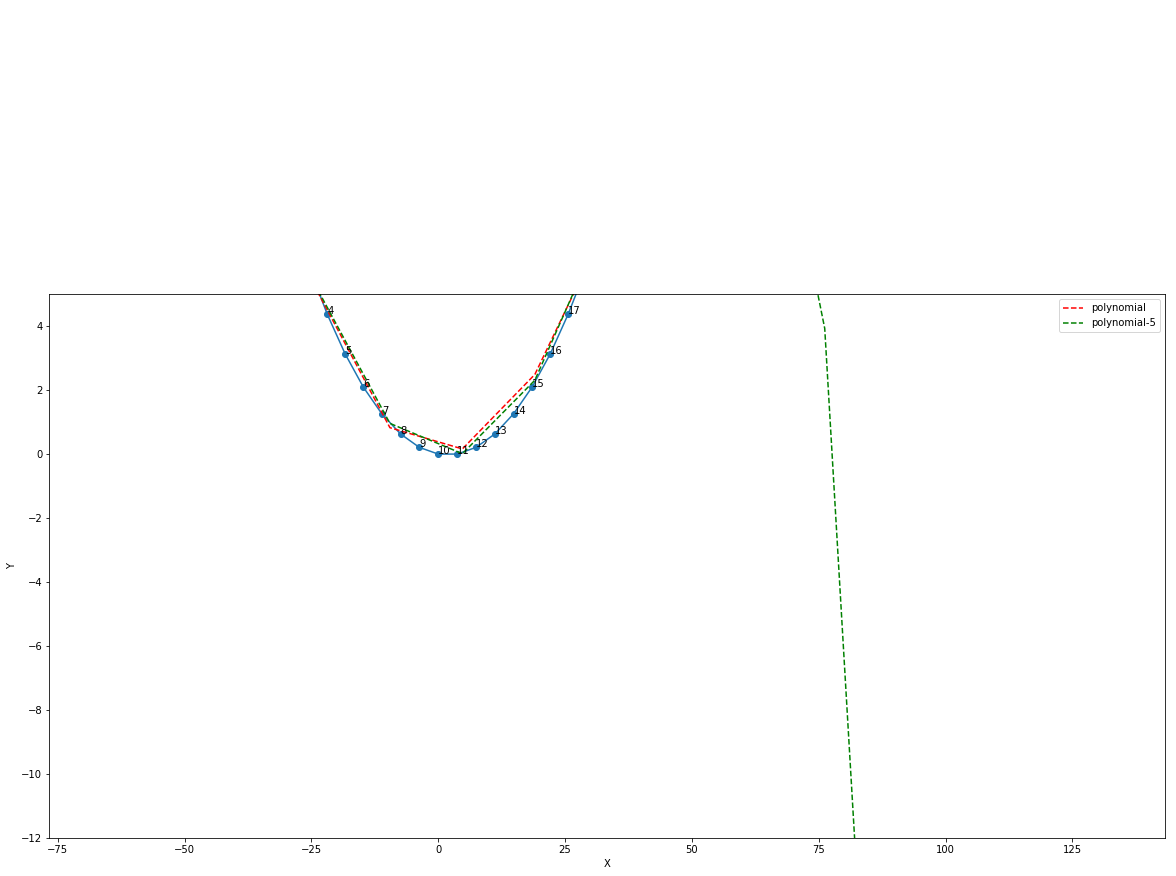

In [57]:
timestamp = 117.2
fig,ax = plot_ref_curve(data_frenet_speed_limit2, timestamp)

p_opt_new = calculate_curvature_func_args(data_frenet_speed_limit2.loc[timestamp]['wp_mat'])
new_ref_x, new_ref_y = get_poly_values(data_frenet_speed_limit2 ,timestamp, p_opt_new)
ax.plot(new_ref_x, new_ref_y, "--g", label="polynomial-5")

print(p_opt_new)
print(p_opt_new[::-1])

# plt.xlim([-15, 20])
# plt.ylim([-12, 5])

plt.legend()
plt.savefig('reference_curve.pdf')

p = np.poly1d(p_opt_new)
print(p)

[-46.74974075 -43.0747672  -39.39979365 -35.7248201  -32.04984655
 -28.374873   -24.69989945 -21.0249259  -17.34995236 -13.67497881
 -10.00000525  -8.00001031  -6.0000001   -4.00000516  -2.00001021
   0.           2.99999242   5.90067892   8.7155102   11.52936423
  14.34160031  17.783396    21.22064426  24.65212481  28.07669377
  31.49317694  34.90038496  38.29718956  41.68237097  45.05490812
  48.41352036]


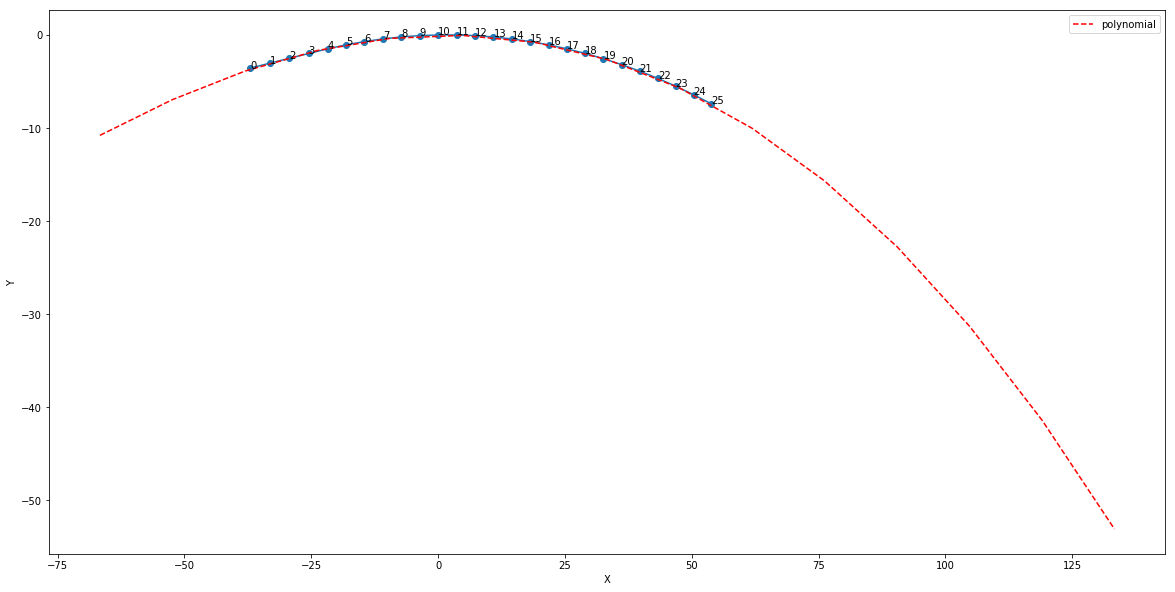

In [38]:
timestamp = 23.2
fig,ax = plot_ref_curve(data_frenet_speed_limit2, timestamp)

p_opt_N15 = calculate_curvature_func_args(data_frenet_wp15_Hist.loc[timestamp]['wp_mat'])
# new_ref_x, new_ref_y = get_poly_values(timestamp, p_opt_N15)
# ax.plot(new_ref_x, new_ref_y, "--g", label="polynomial-N15")


# plt.xlim([-15, 20])
# plt.ylim([-2, 10])

plt.legend()
plt.savefig('reference_curve.pdf')

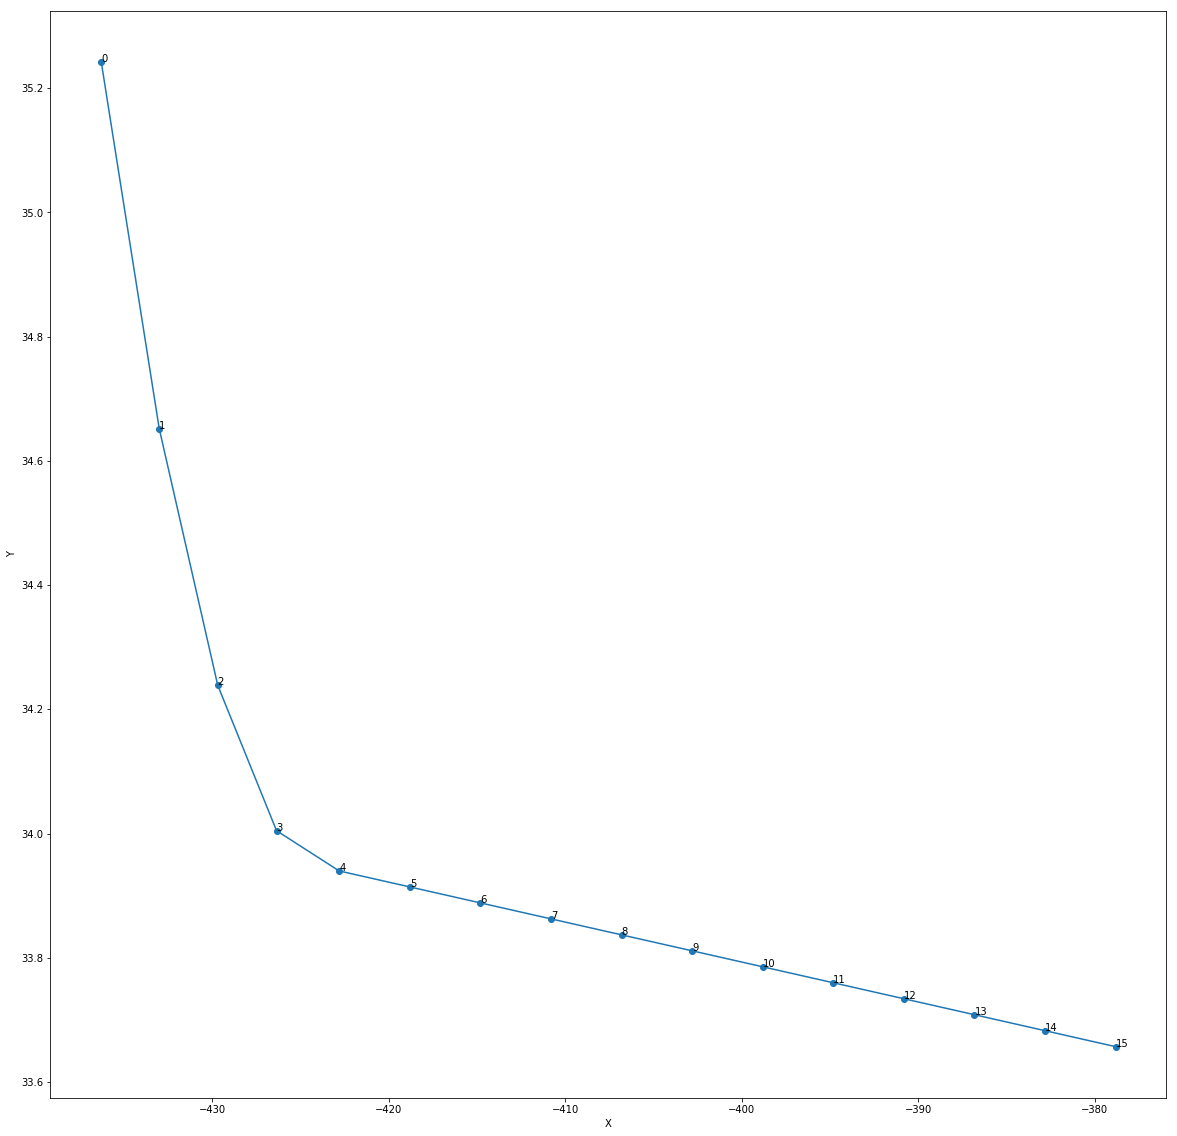

In [14]:
timestamp = 65.2
curve = plot_ref_curve_orginal(data_frenet_speed_limit2, timestamp)
plt.rcParams["figure.figsize"] = (20,20)
# plt.ylim([10,25])

## Checking distance btw wp

In [24]:
data = data_frenet_wp15_Hist
next_wp = data.loc[21.20]['wp_mat_0'][14,:]
current_wp = data.loc[21.20]['refernce_point']

print("Next waypoint: ", next_wp)
print("Current waypoint: ", current_wp)

# Sampling radius btw Wp, if vehicle would reach 80
N = 10
dt = 0.2
velocity = 80
factor = 2
sampling_radius = velocity * dt * factor / 3.6

d = current_wp - next_wp 
d = np.sqrt(np.dot(d.T, d))
print('Distance:', d)
print("Original Sampling radius: ", sampling_radius)

Next waypoint:  [-11.74670982 166.12257385]
Current waypoint:  [-11.72816467 169.79751587]
Distance: 3.6749888092346827
Original Sampling radius:  8.88888888888889


In [93]:
timestamp = 12
next_wp = data_lane_change.loc[timestamp]['wp_mat'][5,:]
current_wp = data_lane_change.loc[timestamp]['wp_mat'][4,:]

d = current_wp - next_wp 
d = np.sqrt(np.dot(d.T, d))
print('Distance:', d)
print("Original Sampling radius: ", sampling_radius)
data.loc[timestamp]['wp_mat'][:,1]

Distance: 5.367192141266412
Original Sampling radius:  8.88888888888889


array([-1.91481969e-06, -1.91481969e-06, -1.91481969e-06, -9.61152719e-07,
       -7.48574744e-09,  0.00000000e+00,  2.54788993e-16,  9.53666972e-07,
        9.53666972e-07,  1.90733394e-06,  1.91107682e-06,  1.77056354e-06,
        2.59868872e-06,  3.41839244e-06,  3.29273368e-06,  4.11442580e-06,
        4.94255098e-06,  5.76693329e-06,  5.63390576e-06,  6.45454519e-06,
       -4.13688442e-03])

In [194]:
import deque

ModuleNotFoundError: No module named 'deque'

In [205]:
from collections import deque

test = deque()
for i in range(5):
    test.append(i)
test

deque([0, 1, 2, 3, 4])

In [207]:
s = deque(maxlen=2)
[s.append(test[i]) for i in range(2)]
s

deque([0, 1])